
Warning: Distribution/sharing of this notebook and other lab notebooks on the internet and other sources is strictly prohibited. You should not provide this notebook to anyone else. you should just use it for the purpose of this assessment only.

You should attempt and submit your work. you can refer to sources/APIs to complete this taks. Copying from each other even a part or so is strictly prohibited and may result in serious action.

# Assessment 5 : Big Data Analytics using Machine Learning
## Due Feburary 25th, 5pm (Firm)
### Total points: 100 ( weighted over 35)

This assessmet will enable you achieve essential experience of machine learning using sklearn and scalable approach to machine learning based on park ML! 

The focus of this assessment is to explore what makes videos popular on various platforms, e.g., Netflix and YouTube. The assessment will focus on YouTube 's data.

**PLEASE NOTE** There can be multiple solutions possible for this assessment. various students will end up implementing different solutions. Therefore, there is not a single solution to fit all students.

### Required Libraries 
Setup the libraries using the following cells. You should select Java 8 when prompted.

In [1]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre op

In [2]:
!pip3 install pandas==1.0.5
!pip3 install pyspark

     |████████████████████████████████| 10.1 MB 13.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.


     |████████████████████████████████| 281.4 MB 43 kB/s 
     |████████████████████████████████| 198 kB 62.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=492f01edd1a2c7816565b315f77d70685e2ec9d50024cfbcd828bb434a0f8842
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [1]:
# if restart of runtime is successful, the execution of this cell should
# prints True

import pandas as pd
print(pd.__version__ == '1.0.5')

True


In [2]:
import numpy as np #for arrays
import json  #to load json files
import matplotlib #visualization
import matplotlib.pyplot as plt #better plotting functions
from matplotlib import cm #color
from datetime import datetime #to work with date and time
import glob #to search file paths and directories
import seaborn as sns #visualization
import re #regular expressions to match strings
import os #forming directories
from matplotlib import pyplot
import seaborn
import random #create random numbers and samples
pd.options.mode.chained_assignment = None

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import your dataset using the following cells for the Youtube videos

In [4]:
from google.colab import files
uploaded = files.upload()

!unzip /content/youtube_data.zip

Saving youtube_data.zip to youtube_data.zip
Archive:  /content/youtube_data.zip
   creating: youtube_data/
  inflating: youtube_data/IN_category_id.json  
   creating: __MACOSX/
   creating: __MACOSX/youtube_data/
  inflating: __MACOSX/youtube_data/._IN_category_id.json  
  inflating: youtube_data/.DS_Store  
  inflating: __MACOSX/youtube_data/._.DS_Store  
  inflating: youtube_data/FR_category_id.json  
  inflating: __MACOSX/youtube_data/._FR_category_id.json  
  inflating: youtube_data/INvideos.csv  
  inflating: __MACOSX/youtube_data/._INvideos.csv  
  inflating: youtube_data/CAvideos.csv  
  inflating: __MACOSX/youtube_data/._CAvideos.csv  
  inflating: youtube_data/FRvideos.csv  
  inflating: __MACOSX/youtube_data/._FRvideos.csv  
  inflating: youtube_data/CA_category_id.json  
  inflating: __MACOSX/youtube_data/._CA_category_id.json  
  inflating: youtube_data/US_category_id.json  
  inflating: __MACOSX/youtube_data/._US_category_id.json  
  inflating: youtube_data/USvideos.csv  

In [5]:
#from google.colab import drive

#drive.mount('/content/gdrive')

# Section 5.1. : Machine Learning with Sklearn (45 points)

## 5.1.1 Data loading and Preprocessing (5 pts)

The dataset consists of a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions, e.g., number of views, shares, comments and likes. "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.


#### 5.1.1.1: Combining Multiple CSV's. (2 pts.)

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

In [5]:
#import all the csv files
files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
#files = [i for i in glob.glob('/content/gdrive/MyDrive/youtube-data/*.csv'.format('csv'))]
sorted(files)

# Task: Merge all dataframes to single dataframe "combined_data" and add a 'country' column. 
all_dataframes = list()
for csv in files:
  #all_dataframes.append(pd.read_csv(csv))
  frame = pd.read_csv(csv, index_col = 0)
  frame['country'] = os.path.basename(csv)
  all_dataframes.append(frame)

combined_data = pd.concat(all_dataframes)
combined_data['country'] = combined_data['country'].map(lambda x: x.lstrip('+-').rstrip('videos.csv'))
combined_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US


#### 5.1.1.2: Map category Id's to categories (2 pts)

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)

In [6]:
combined_data['category_id'] = combined_data['category_id'].astype(str)
js_files = [i for i in glob.glob('/content/youtube_data/*.json'.format('json'))]
#js_files = [i for i in glob.glob('/content/gdrive/MyDrive/youtube-data/*.format('json'))]
sorted(js_files)

id_to_category = {}
for x in js_files:
  js = pd.read_json(x)


In [7]:
js

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
5,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
6,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
7,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
8,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
9,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [8]:
 for category in js ["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]
combined_data["category"] = combined_data["category_id"].map(id_to_category)

In [9]:
#combined_data.insert(4, 'category', # Add code here)

combined_data.head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
video_id,,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,Entertainment
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,Comedy
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,Entertainment
il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,IN,Entertainment
7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,IN,Music
c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,IN,Music
KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...,IN,Entertainment


In [10]:
combined_data.shape

(159906, 17)

#### 5.1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [11]:
combined_data.info()
combined_data['trending_date'] = pd.to_datetime(combined_data["trending_date"],format ="%y.%d.%m")
combined_data['publish_time'] = pd.to_datetime(combined_data["publish_time"],format= "%Y-%m-%dT%H:%M:%S.%fZ")

<class 'pandas.core.frame.DataFrame'>
Index: 159906 entries, kzwfHumJyYc to ooyjaVdt-jA
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trending_date           159906 non-null  object
 1   title                   159906 non-null  object
 2   channel_title           159906 non-null  object
 3   category_id             159906 non-null  object
 4   publish_time            159906 non-null  object
 5   tags                    159906 non-null  object
 6   views                   159906 non-null  int64 
 7   likes                   159906 non-null  int64 
 8   dislikes                159906 non-null  int64 
 9   comment_count           159906 non-null  int64 
 10  thumbnail_link          159906 non-null  object
 11  comments_disabled       159906 non-null  bool  
 12  ratings_disabled        159906 non-null  bool  
 13  video_error_or_removed  159906 non-null  bool  
 14  description             15

In [12]:
combined_data.isnull().sum()

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               5339
country                      0
category                   350
dtype: int64

In [13]:
# Add your Code here to remove NA's
combined_data = combined_data.dropna()
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 154229 entries, kzwfHumJyYc to ooyjaVdt-jA
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trending_date           154229 non-null  datetime64[ns]
 1   title                   154229 non-null  object        
 2   channel_title           154229 non-null  object        
 3   category_id             154229 non-null  object        
 4   publish_time            154229 non-null  datetime64[ns]
 5   tags                    154229 non-null  object        
 6   views                   154229 non-null  int64         
 7   likes                   154229 non-null  int64         
 8   dislikes                154229 non-null  int64         
 9   comment_count           154229 non-null  int64         
 10  thumbnail_link          154229 non-null  object        
 11  comments_disabled       154229 non-null  bool          
 12  ratings_disabled    

In [14]:
# print
print('validate_na',(combined_data.shape))

validate_na (154229, 17)


## 5.2 Exploratory Data Analysis & Feature Engineering (20pt)


**Exploratory Data Analysis:** 
EDA aims to analyze data sets by summarizing its key characteristics assisted by visualizations. EDA communicates insights beyond formal modeling/hypothesis testing with or without statistical model.

**Feature Engineering:** 
The primary object of feature engineering is to extract features using domain knowledge. It aims to extract features from raw data using various data mining approaches.

These features are fed to various machine learning classifiers. These features are also called as covariates, predicators, or simply a new column in data frame.

#### 5.2.1: Calculating Mean, standard deviation, min and max. (1 pt)

In this section, we will focus to compute various satistics, i.e., mean, standard deviation, min and max for numerical features in the dataset and then store them into lists, i.e.,  [views, likes, dislikes, comment_count].

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds.

In [15]:
combined_data.describe()

,views,likes,dislikes,comment_count
count,1.542290e+05,1.542290e+05,1.542290e+05,1.542290e+05
mean,1.282135e+06,4.084849e+04,2.016090e+03,4.552620e+03
std,4.606547e+06,1.513268e+05,1.783895e+04,2.256879e+04
min,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.638600e+04,1.328000e+03,8.200000e+01,1.730000e+02
50%,3.144400e+05,6.361000e+03,2.990000e+02,7.680000e+02
75%,9.491140e+05,2.599500e+04,1.026000e+03,2.730000e+03
max,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


In [16]:
# Add your code here
maxs = combined_data.describe().iloc[7].values.tolist()
mins = combined_data.describe().iloc[3].values.tolist()
stds = combined_data.describe().iloc[2].values.tolist()
means = combined_data.describe().iloc[1].values.tolist()

In [17]:
# print here
print('check_min_max_mean_std',([maxs, mins, stds, means]))

check_min_max_mean_std [[225211923.0, 5613827.0, 1643059.0, 1228655.0], [223.0, 0.0, 0.0, 0.0], [4606547.383292062, 151326.79131692532, 17838.946154412628, 22568.78630305928], [1282134.6361384694, 40848.48799512413, 2016.0899701093829, 4552.620207613354]]


#### 5.2.2: Rescaling the features (1 pt)

From the above section, it is clear that the numerical values range is really high.  we can use rescaling to avoid numerical instability problems. We can rescale likes, views, dislikes, and comment_count using log scale (base e). Let us store rescaled features in dataframe as likes_log, views_log, dislikes_log and comment_log.

NOTE- log 0 is not defined, therefore, you should add 1 to each value prior to taking the log.

In [18]:
# Add your code here
combined_data['likes_log'] = np.log(1 + combined_data['likes']) 
combined_data['views_log'] = np.log(1 + combined_data['views']) 
combined_data['dislikes_log'] = np.log(1 + combined_data['dislikes']) 
combined_data['comment_log'] = np.log(1 + combined_data['comment_count']) 

In [19]:
combined_data.describe()

,views,likes,dislikes,comment_count,likes_log,views_log,dislikes_log,comment_log
count,1.542290e+05,1.542290e+05,1.542290e+05,1.542290e+05,154229.000000,154229.000000,154229.000000,154229.000000
mean,1.282135e+06,4.084849e+04,2.016090e+03,4.552620e+03,8.576654,12.556466,5.618475,6.430801
std,4.606547e+06,1.513268e+05,1.783895e+04,2.256879e+04,2.340390,1.814343,2.025127,2.241098
min,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.411646,0.000000,0.000000
25%,9.638600e+04,1.328000e+03,8.200000e+01,1.730000e+02,7.192182,11.476127,4.418841,5.159055
50%,3.144400e+05,6.361000e+03,2.990000e+02,7.680000e+02,8.758098,12.658552,5.703782,6.645091
75%,9.491140e+05,2.599500e+04,1.026000e+03,2.730000e+03,10.165698,13.763285,6.934397,7.912423
max,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06,15.540743,19.232552,14.312071,14.021431


In [20]:
# Print results
print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.576653840075503, 12.556465515646423, 5.618474952050349, 6.4308007177583155]


#### 5.2.3: Plotting the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

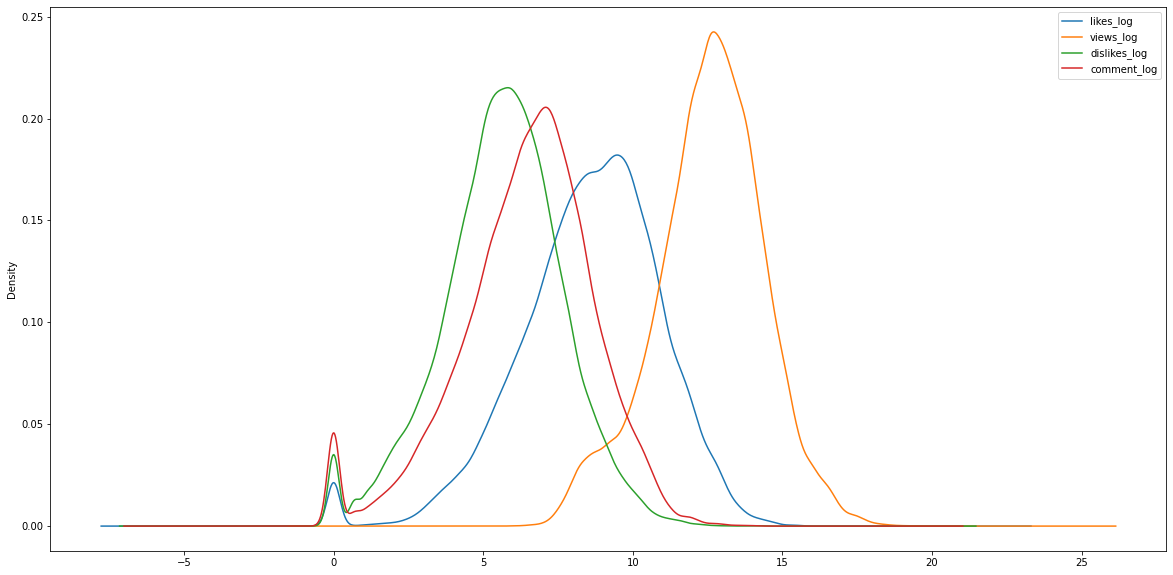

In [21]:
# Add your code here for plotting the distribution
log_df=combined_data[['likes_log','views_log','dislikes_log','comment_log']]
log_df.plot.kde(figsize=(20,10))
# plot data, Kernal Density Estimation for estimating Probability Density Function

#### 5.2.4: Comparing views, likes, dislikes against categories (3 pt)

Let us gain isights into data using various catergories, views, likes and dislikes.

Draw three plots for the following:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country? 
* What are some videos which got popular because they were disliked? 

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

In [22]:
# Your code goes here
# Plots will be manually graded
##1-Total videos for each category:
by_category = combined_data.groupby(["category"]).size().sort_values(ascending = False)
print('Total videos for each category: \n', by_category)

Total videos for each category: 
 category
Entertainment           48964
Music                   17818
Comedy                  14790
News & Politics         14713
People & Blogs          13954
Sports                   9488
Howto & Style            9309
Film & Animation         7874
Science & Technology     4846
Education                4544
Gaming                   3592
Pets & Animals           1522
Autos & Vehicles         1406
Travel & Events           889
Shows                     485
Movies                     33
Trailers                    2
dtype: int64


In [23]:
import plotly.express as px
df_cat=pd.DataFrame(by_category)
df_cat['category'] = df_cat.index
df_cat.columns=['a','b']
fig4 = px.bar(df_cat, x="b", y="a",color='a',labels={'b':'Category','a':'Videos/Category'}, height=400)
fig4.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

(Text(0.5, 1.0, 'Distribution of Views against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'View Logs'))

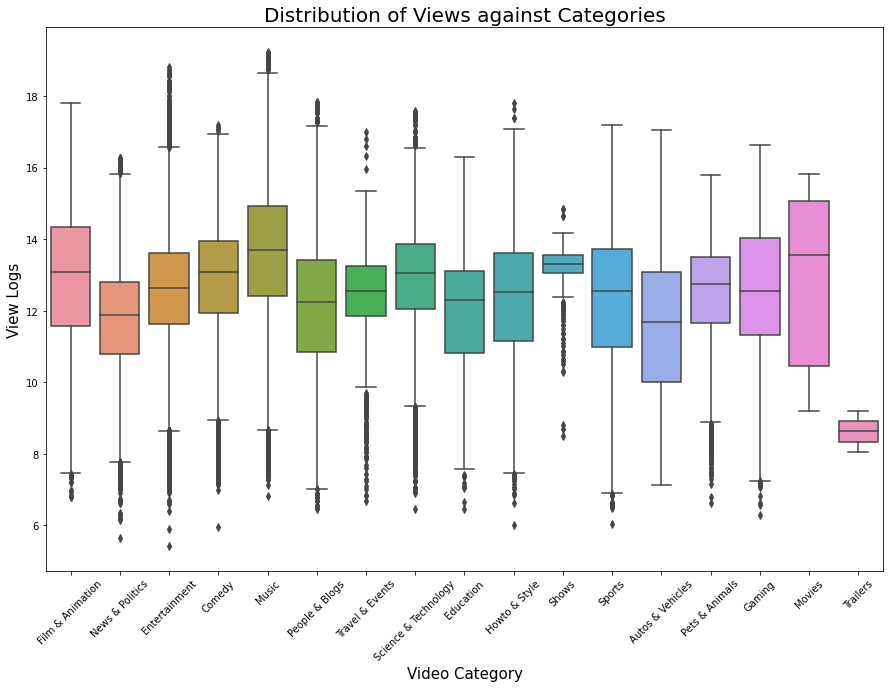

In [24]:
##2-Distribution of views against categories, using boxplot and views on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="views_log", data=combined_data[['category','views_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Views against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='View Logs',fontsize=15)          
# #To close the warning
# fill with colors

(Text(0.5, 1.0, 'Distribution of Dislikes against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'Dislike Logs'))

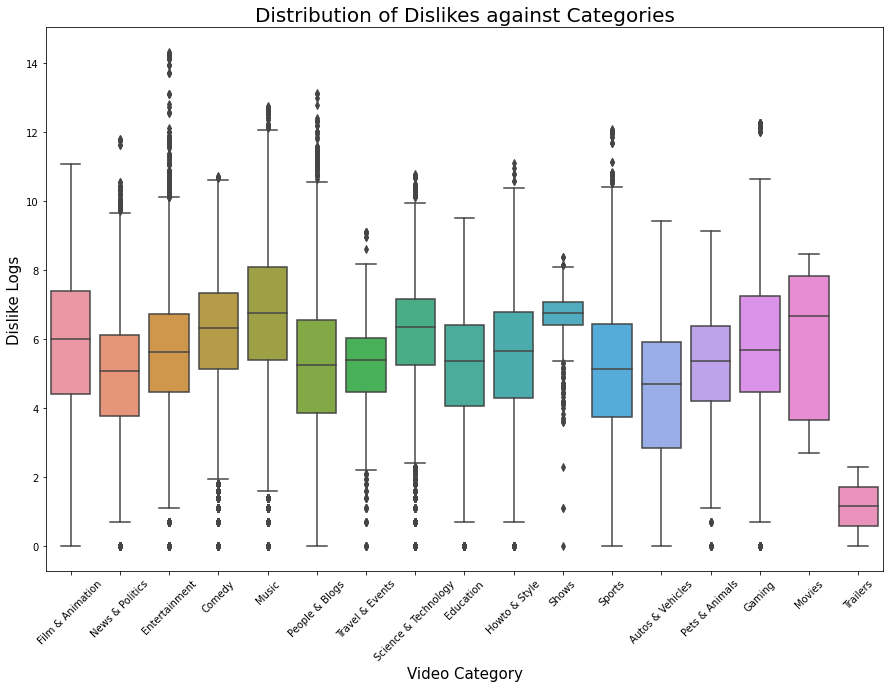

In [25]:
##3-Distribution of dislikes against categories, Using boxplot and dislikes on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="dislikes_log", data=combined_data[['category','dislikes_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Dislikes against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='Dislike Logs',fontsize=15)  


In [26]:
#How long does a video trend in a country?
#What are some videos which got popular because they were disliked?

**How long does a video trend in a country?**

(<matplotlib.axes._subplots.AxesSubplot at 0x7efd2e47da10>,
 Text(0.5, 1.0, 'Number of Mean Video Trending in Each Country '))

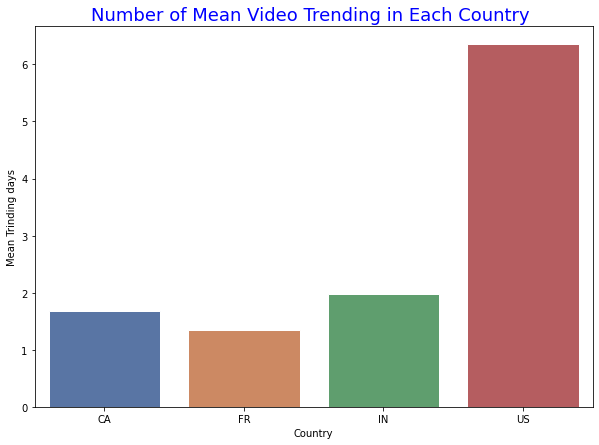

In [27]:
df=combined_data.drop_duplicates()
df1=df.groupby(['title','country']).size().reset_index(name='count')
trending=df1.groupby('country')['count'].mean().to_frame().reset_index().rename(columns={"country": "Country", "count": "Mean Trinding days"})

fig, ax = pyplot.subplots(figsize=(10, 7)),sns.set(font_scale=1.5)
sns.barplot(x="Country", y="Mean Trinding days", data=trending,ax=ax),plt.title('Number of Mean Video Trending in Each Country ',color='Blue')

**What are some videos which got popular because they were disliked?**

In [28]:
df2=df.groupby(['title','dislikes','likes']).size().reset_index(name='Trend_Days')
trending_dislikes=df2.loc[(df2['dislikes'] > df2['likes']) & (df2['Trend_Days'] >= 3)] #Videos which got trends and have dislikes more than likes#
trending_dislikes=trending_dislikes.sort_values(['Trend_Days'],ascending=[ False])
print('Videos which got popular because they were disliked: \n \n',trending_dislikes.title.to_string(index=False))

Videos which got popular because they were disliked: 
 
  Jeffrey Tambor Fired From 'Transparent' Follow...
 5 Things You Missed at the 2018 SAG Awards | E...
 Fergie Performs The U.S. National Anthem / 201...
                        Staudt on Sports I 1-22-18
         WATCH: Sen. Mitch McConnell on tax reform
                               二贵摔跤 - tienghoa.net


#### 5.2.5: Feature Engineering (8 pts)

##### a. Processing tags (1 pt)

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [29]:
# Add your code here
num_tags=[]
xdf=combined_data.reset_index(drop=True)
for i in range(len(combined_data)):
  if xdf.at[i,'tags']=='[none]': #some videos has no tags but instead [none], so we are going to consider it as Zero tags.
    count=0
  else:
    count=(xdf.at[i,'tags']).count("|") + 1 
  num_tags.append(count)
combined_data['num_tags']=num_tags
combined_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags
video_id,,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19
10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20
kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18 16:39:29,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27
BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14
D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24


##### b. Processing description and title (2 pts.)

Calculate the length of description and title and add them as features to the dataset

In [30]:
# Add your code here
combined_data["desc_len"]=combined_data["description"].apply(lambda x: len(x))

In [31]:
# Add your code here

combined_data["len_title"]=combined_data["title"].apply(lambda x: len(x))

In [32]:
# Print cell
print('check_tags_title_description \n',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

check_tags_title_description 
 [count    154229.000000
mean         18.579846
std          11.916391
min           0.000000
25%           9.000000
50%          17.000000
75%          26.000000
max         124.000000
Name: num_tags, dtype: float64, count    154229.000000
mean        960.566787
std         857.801660
min           1.000000
25%         363.000000
50%         718.000000
75%        1289.000000
max        5260.000000
Name: desc_len, dtype: float64, count    154229.000000
mean         56.412445
std          22.975154
min           2.000000
25%          38.000000
50%          54.000000
75%          74.000000
max         100.000000
Name: len_title, dtype: float64]


##### c. Processing publish_time. (4 pts.)


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [33]:
date_data=combined_data['publish_time']

In [34]:
# Add your code here
combined_data['publish_time'] =date_data.apply(lambda x: pd.to_datetime(x).time())
combined_data['publish_date'] =date_data.apply(lambda x: pd.to_datetime(x).date())

#day on which video was published
combined_data['publish_weekday']=date_data.apply(lambda x: x.dayofweek)+1

import random
random_index = random.randint(0,combined_data.shape[0]-1)

In [35]:
# Print cell
print('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

check_date_time_processing [datetime.time(23, 17, 59), datetime.date(2018, 5, 3), [18591, 18896, 22089, 22446, 22466, 23520, 26221]]


In [36]:
combined_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,publish_date,publish_weekday
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15,920,81,2017-11-12,7
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19,2232,58,2017-11-13,1
10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14,482,58,2017-11-12,7
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20,263,30,2017-11-12,7
kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11,753,88,2017-11-13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,16:39:29,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27,926,52,2018-05-18,5
BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14,46,28,2018-05-18,5
D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24,775,84,2018-05-18,5


##### d. Number of videos per weekday (1 pt)

Calculate the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

(<matplotlib.axes._subplots.AxesSubplot at 0x7efd2e652750>,
 Text(0.5, 1.0, 'Number of puplished videos per week days '))

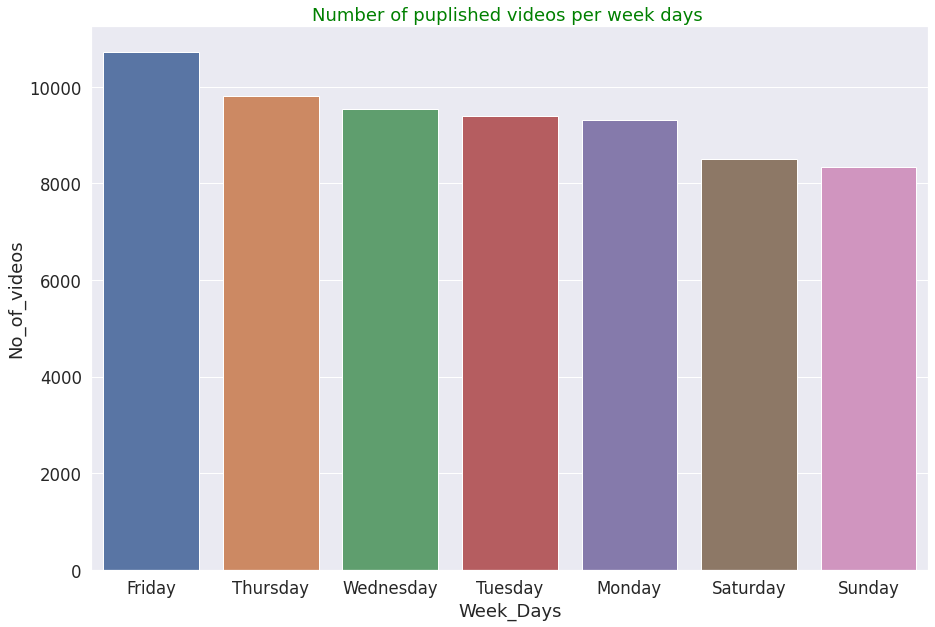

In [37]:
# Add your code for plot here

##Creating dataframe after deleting videos which stay trending for more than one day according to the Video ID
dfx=combined_data.reset_index(level=0)[['video_id','publish_weekday']].drop_duplicates(subset = ['video_id'], keep = 'last')

##Mapping the day number : day name
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfx['publish_weekday'] = dfx['publish_weekday'].map(dayOfWeek)

##Calculating and plotting
videos_weekday = dfx['publish_weekday'].value_counts().to_frame().reset_index().rename(columns={"index": "Week_Days", "publish_weekday": "No_of_videos"})
fig, ax = pyplot.subplots(figsize=(15, 10)),sns.set(font_scale=1.5)
sns.barplot(x="Week_Days", y="No_of_videos", data=videos_weekday,ax=ax),plt.title('Number of puplished videos per week days ',color='Green')
# Plots will be manually graded

#### 5.2.6: Dropping irrelevant non numeric columns (1 pt.)

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers. 

Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature. 

In [38]:
combined_data.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'publish_date', 'publish_weekday'],
      dtype='object')

In [39]:
# Add your code here
combined_data.drop(['trending_date', 'title', 'channel_title', 'category_id',
                    'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
                    'thumbnail_link', 'description', 'publish_date'], axis = 1,inplace = True)

In [40]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,publish_weekday
video_id,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15,920,81,7
zUZ1z7FwLc8,True,False,False,IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19,2232,58,1
10L1hZ9qa58,False,False,False,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14,482,58,7
N1vE8iiEg64,False,False,False,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20,263,30,7
kJzGH0PVQHQ,False,False,False,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11,753,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27,926,52,5
BZt0qjTWNhw,False,False,False,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14,46,28,5
D6Oy4LfoqsU,False,False,False,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24,775,84,5


#### 5.2.7: Convert categorical features in the dataset into one hot vectors. (3 pts)

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [41]:
combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')
combined_data.category = combined_data.category.astype('category')
combined_data= pd.get_dummies(combined_data)
# Hint: Use pd.get_dummies()range. 

In [42]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,country_CA,country_FR,country_IN,country_US,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Movies,category_Music,category_News & Politics,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
print('check_final_df',(combined_data.shape))

check_final_df (154229, 38)


In [44]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('combined_data.csv')

#### 5.2.8: Split into x and y (1 pt)

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [45]:
combined_data.columns

Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN',
       'country_US', 'category_Autos & Vehicles', 'category_Comedy',
       'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Movies', 'category_Music',
       'category_News & Politics', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_Shows', 'category_Sports', 'category_Trailers',
       'category_Travel & Events', 'publish_weekday_1', 'publish_weekday_2',
       'publish_weekday_3', 'publish_weekday_4', 'publish_weekday_5',
       'publish_weekday_6', 'publish_weekday_7'],
      dtype='object')

In [46]:
# Add your code here
combined_data=pd.read_csv('combined_data.csv').set_index('video_id')
label = combined_data['label']
features = combined_data.drop(['label'],axis=1)

In [47]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,label,dislikes_log,comment_log,num_tags,desc_len,len_title,country_CA,country_FR,country_IN,country_US,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Movies,category_Music,category_News & Politics,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
# print cell
print('check_x_y_split',([features.shape, label.describe()]))

check_x_y_split [(154229, 37), count    154229.000000
mean         12.556466
std           1.814343
min           5.411646
25%          11.476127
50%          12.658552
75%          13.763285
max          19.232552
Name: label, dtype: float64]


In [49]:
label

video_id
kzwfHumJyYc    13.907477
zUZ1z7FwLc8    13.288051
10L1hZ9qa58    13.068939
N1vE8iiEg64    14.032782
kJzGH0PVQHQ    13.047674
                 ...    
1PhPYr_9zRY    15.926830
BZt0qjTWNhw    14.337638
D6Oy4LfoqsU    13.879848
oV0zkMe1K8s    15.549078
ooyjaVdt-jA    16.148248
Name: label, Length: 154229, dtype: float64

In [50]:
features

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,dislikes_log,comment_log,num_tags,desc_len,len_title,country_CA,country_FR,country_IN,country_US,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Movies,category_Music,category_News & Politics,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,6.683361,6.783325,15,920,81,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
zUZ1z7FwLc8,True,False,False,6.601230,6.807935,0.000000,19,2232,58,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10L1hZ9qa58,False,False,False,7.606885,5.497168,5.010635,14,482,58,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
N1vE8iiEg64,False,False,False,11.161295,7.393263,7.895436,20,263,30,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
kJzGH0PVQHQ,False,False,False,6.200509,5.683580,4.204693,11,753,88,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,8.307213,11.044696,27,926,52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
BZt0qjTWNhw,False,False,False,10.549569,7.234177,7.885329,14,46,28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
D6Oy4LfoqsU,False,False,False,10.780393,6.940222,8.292298,24,775,84,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 5.3 : Machine Learning using sklearn (15 pts)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 5.3.1 : Split data into train and test (1 pt)

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.

In [51]:
from sklearn.model_selection import train_test_split
# Add your code here
x_train, x_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
# print cell.
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123383, 37), (30846, 37), (123383,), (30846,)]


### 5.3.2: Train Machine Learning Models.

#### 5.3.2.1 Linear Regression (3 pts)

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Add your code here
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [54]:
# Create linear regression object
lin_R = LinearRegression()

In [55]:
# Train the model using the training sets
lin_R.fit(x_train, y_train)

LinearRegression()

In [56]:
# Make predictions

y_predict_test = lin_R.predict(x_test)
y_predict_train= lin_R.predict(x_train)

In [57]:
# The coefficients
#print('Coefficients: \n', lin_R.coef_)

print('r Squared: %.2f'
      % lin_R.score(x_test, y_test))

r Squared: 0.86


In [58]:
print('mse_value of Test=',mean_squared_error(y_test, y_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_predict_train))
mse_test= mean_squared_error(y_test, y_predict_test)

mse_value of Test= 0.4440500387860451
mse_value of Train= 0.44505513193882945


In [59]:
print('check_lr', (np.sqrt(mean_squared_error(y_test, y_predict_test))))

check_lr 0.6663707967686198


#### 5.3.2.2 Lasso Regression (Task1)

The first task for this assignment is to implement one linear model from supervised learning. 

https://scikit-learn.org/stable/supervised_learning will provide a glimpse of various linear models available in scikit learn libraries. We will implement some of the linear models to check the accuracy score.

**Lasso Linear Model**

Laso is a type of linear model that estimates sparse coefficient. This feature helps  that leads to reduction in features with fewer non zero coefficients. Lasso is imported through sklearn.linear_model libraries.

The alpha value in the model is the lasso alpha parameter. As alpha value increases, more coefficients of features are treated as zero. If alpha is zero, the coefficients are same as linear regression. The optimum value of alpha is taken between 0 to 1. This example takes the value of alpha as 0.1. Further validations can also be done through cross validation techniques.

In [60]:
lasso_r = linear_model.Lasso(alpha=0.1)

In [61]:
lasso_r.fit(x_train, y_train)

Lasso(alpha=0.1)

In [62]:
y_predict_test = lasso_r.predict(x_test)
y_predict_train= lasso_r.predict(x_train)

In [63]:
lasso_r.score(x_test, y_test)

0.8373939796852172

In [64]:
print('r Squared: %.2f'
      % lasso_r.score(x_test, y_test))
print('Model parameter used are:',lasso_r)
print("MAE value         :", metrics.mean_absolute_error(y_test,y_predict_test))
print("RMSE value        :",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))


r Squared: 0.84
Model parameter used are: Lasso(alpha=0.1)
MAE value         : 0.55446427521467
RMSE value        : 0.73063083742423


12.557263432364504
[ 0.          0.31217941  0.          0.49193392  1.1057955   0.
  0.          0.          0.          0.         -0.17147651  0.
  0.         -0.         -0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.          0.          0.          0.         -0.
 -0.        ]
Score: 0.8373939796852172


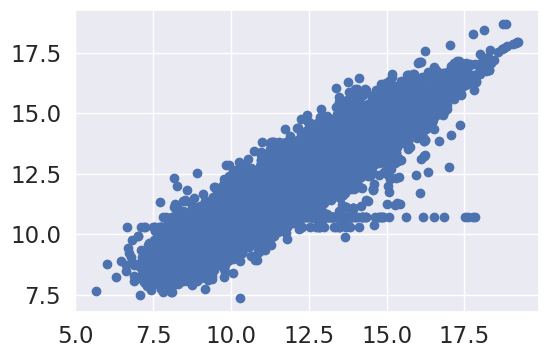

In [65]:

print(lasso_r.intercept_)
print(lasso_r.coef_)

pr = lasso_r.predict(x_test)

print("Score:", lasso_r.score(x_test, y_test))
plt.figure(dpi=100)
plt.scatter(y_test, pr)

The accuracy for lasso regression is 84%. Next we try with Ridge regression model.

#### 5.3.2.3 Ridge Regression


Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares. The alpha value works on same principle. Larger the values, greater the shrinkage of coefficient values

In [66]:
ridge_r = Ridge(alpha=0.1)
ridge_r.fit(x_train, y_train)
y_predict_test = ridge_r.predict(x_test)
ridge_r.score(x_test, y_test)

print('score: %.2f'
      % ridge_r.score(x_test, y_test))
print('Model parameter used are:',ridge_r)
print("MAE value         :", metrics.mean_absolute_error(y_test,y_predict_test))
print("RMSE value        :",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

score: 0.86
Model parameter used are: Ridge(alpha=0.1)
MAE value         : 0.5054928981415091
RMSE value        : 0.666389047958706


#### 5.3.2.4 Stochastic Gradient Descent - SGD Regressor

SGD is a type of iterative method that helps in optimizing features to gain suitable smoothness in the descent. This is being implemented just to check if there is any impact on accuracy. 



In [67]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
scaler.fit(x_train)  
X1_train = scaler.transform(x_train)
X1_test = scaler.transform(x_test)  # apply same transformation to test data

In [69]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=200, tol=0.001))

In [70]:
reg.fit(X1_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=200))])

In [71]:
y_predict_test = reg.predict(X1_test)
reg.score(X1_test, y_test)

print(reg.score(X1_test, y_test))
print('Model parameter used are:',reg)
print("MAE value         :", metrics.mean_absolute_error(y_test,y_predict_test))
print("RMSE value        :",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

-1.2375241822657448e+16
Model parameter used are: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=200))])
MAE value         : 122365053.46582744
RMSE value        : 201561014.23034757


The score comes in negative values for various iterations. Hence ruling it out, linear models seems more appropriate with given features

## 5.4  Dimensionality reduction with PCA (6 pts)

##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep. (3 pts)

[(0, 0.0934099332688184), (1, 0.14319107233793274), (2, 0.18258334050782274), (3, 0.2219737195111788), (4, 0.25695214391317606), (5, 0.29126124844742507), (6, 0.32496866047643186), (7, 0.35725170900234793), (8, 0.38921158327118877), (9, 0.421051952100915), (10, 0.4522406409861591), (11, 0.4828923774850224), (12, 0.5132368733187977), (13, 0.5426913632975252), (14, 0.5717230765242706), (15, 0.6005557593880493), (16, 0.6287874664216458), (17, 0.6564464657458366), (18, 0.6839159322231024), (19, 0.7112644855903222), (20, 0.7384130726507131), (21, 0.7654506163544035), (22, 0.79242643443149), (23, 0.8192758716396454), (24, 0.8454349862276131), (25, 0.8712625341217852), (26, 0.8967693002737167), (27, 0.92000850037608), (28, 0.9413662400368236), (29, 0.9611316673419386), (30, 0.9788396613468554), (31, 0.9947502177824762), (32, 0.9982500621881424), (33, 1.0), (34, 1.0), (35, 1.0), (36, 1.0)]


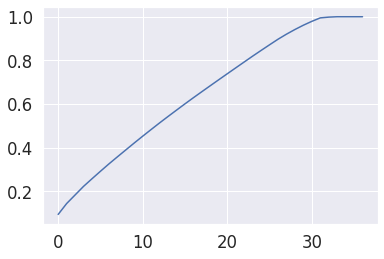

In [72]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Add your code here

pca = PCA()
sc = StandardScaler()
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)

[(0, 0.0934099332688184), (1, 0.14319107233793274), (2, 0.18258334050782274), (3, 0.2219737195111788), (4, 0.25695214391317606), (5, 0.29126124844742507), (6, 0.32496866047643186), (7, 0.35725170900234793), (8, 0.38921158327118877), (9, 0.421051952100915), (10, 0.4522406409861591), (11, 0.4828923774850224), (12, 0.5132368733187977), (13, 0.5426913632975252), (14, 0.5717230765242706), (15, 0.6005557593880493), (16, 0.6287874664216458), (17, 0.6564464657458366), (18, 0.6839159322231024), (19, 0.7112644855903222), (20, 0.7384130726507131), (21, 0.7654506163544035), (22, 0.79242643443149), (23, 0.8192758716396454), (24, 0.8454349862276131), (25, 0.8712625341217852), (26, 0.8967693002737167), (27, 0.92000850037608), (28, 0.9413662400368236), (29, 0.9611316673419386), (30, 0.9788396613468554), (31, 0.9947502177824762), (32, 0.9982500621881424), (33, 1.0)]


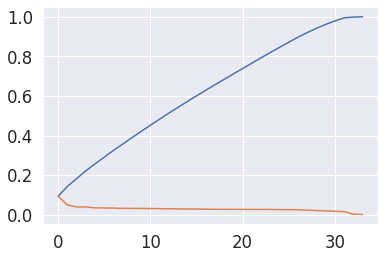

In [73]:
#It is strating faltten with number of component = 34 (99% of variance)
pca = PCA(34)
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)
plt.plot(pd.Series(pca.explained_variance_ratio_))

##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided. (1 pts)

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [74]:
# Add your code here
pca = PCA(n_components=34)
x_train_Trans=pca.fit_transform(x_train)
x_test_Trans=pca.transform(x_test)

In [75]:
x_train_Trans

array([[-1.18698344, -0.19629962, -1.74502162, ...,  0.18371158,
        -0.14004584,  0.02314707],
       [ 0.09111618, -0.19884039, -0.82269685, ..., -0.42163052,
        -0.01298446, -0.28458585],
       [ 1.25597799,  0.87424018, -1.63056746, ..., -0.97864796,
         0.0062563 , -0.22557323],
       ...,
       [-2.25807731, -0.07197147,  2.00143501, ...,  0.82707941,
         0.01974311,  0.05971743],
       [ 4.43067261,  1.34411661,  3.30747396, ...,  0.22386356,
        -0.52626623, -1.26112496],
       [-0.38385757,  0.18394374,  0.63574502, ...,  0.33358915,
         0.04612311,  0.04445584]])

In [76]:
# Print cell.
print('check_pca', (x_train_Trans[:50,:]))

check_pca [[-1.18698344 -0.19629962 -1.74502162 ...  0.18371158 -0.14004584
   0.02314707]
 [ 0.09111618 -0.19884039 -0.82269685 ... -0.42163052 -0.01298446
  -0.28458585]
 [ 1.25597799  0.87424018 -1.63056746 ... -0.97864796  0.0062563
  -0.22557323]
 ...
 [-1.08302864  0.54934388  0.70213772 ...  0.2126897  -0.21864415
   0.26084669]
 [ 2.4563177  -2.03956653  0.14530877 ...  1.17185556 -0.14579692
   0.16136025]
 [ 1.62869266  1.45617117  1.45342869 ...  0.77473147  0.63791858
  -0.35997171]]


## 5.5 Ensemble Methods

### 5.5.1 Random Forest. (10 pts)

##### Step 1: Hyperparameter tuning. 
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is. 

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization. (4 pts)


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Add your code here
# Only tune the max depth of the trees in the RF hyperparameter.
#grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators':[140],'max_depth':[25,30,35,40,45]},cv=5)
#grid.fit(x_train_Trans, y_train)
#grid.best_params_
# depth = [40]
# nEstimator = [140]

In [78]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [79]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
##rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
##rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
##rf_random.fit(x_train_Trans, y_train)

Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set. (3 pts)

In [80]:
# Add your code here
# Set n_estimators = 140
reg_RF = RandomForestRegressor(n_estimators=140, max_depth=40)
reg_RF.fit(x_train_Trans, y_train)
y_pred_RF = reg_RF.predict(x_test_Trans)

In [81]:
print(reg_RF.score(x_test_Trans, y_test))
print('check_rf', (np.sqrt(mean_squared_error(y_test, y_pred_RF))))
print('MSE Value', mean_squared_error(y_test, y_pred_RF))


0.9387209847841412
check_rf 0.4485238863971467
MSE Value 0.20117367666880057


###5.5.2 Gradient Boosting Regressor

GBR is a type of ensemble learning which is built on principle of Boosting methods unlike Random Forest that relies on bagging methods.

It gives a prediction model in the form of an ensemble of weak decision tree prediction models.

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error').fit(x_train_Trans, y_train)

In [83]:
y_pred_est = est.predict(x_test_Trans)

In [84]:
print('MSE Value', mean_squared_error(y_test, y_pred_est))
print('Accuracy Score', est.score(x_test_Trans, y_test))
print('RMSE', (np.sqrt(mean_squared_error(y_test, y_pred_est))))

MSE Value 0.8186565445097079
Accuracy Score 0.7506310583060845
RMSE 0.9047964105309592


##### Hyperparameter tuning.

In [85]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


The hyperparameter tuning is done using RandomizedSearchCV, where parameters with various combination have been stored as random_grid. This can be used in below .fit() method, however the step takes a longtime to be executed on Colab (Nearly 2hrs for 2 iterations) Please remove comment with ## to run the below code

In [86]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
##gbr = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
##gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
##gbr_random.fit(x_train_Trans, y_train)

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor


###5.5.3 Voting Regressor

A voting regressor is an ensemble method that fits several base regressors implemented on the whole dataset. Then it averages the individual predictions to form a final prediction. It is useful when we have to choose between a set of equally well performing models for balancing out their individual weaknesses.

In [88]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(x_train_Trans, y_train)

In [89]:
y_pred_RF = ereg.predict(x_test_Trans)

In [90]:
print('MSE Value', mean_squared_error(y_test, ereg.predict(x_test_Trans)))
print('Accuracy Score', ereg.score(x_test_Trans, y_test))
print('RMSE', (np.sqrt(mean_squared_error(y_test, y_pred_RF))))

MSE Value 0.3018727780287592
Accuracy Score 0.9080472810141429
RMSE 0.5494295023283325


In [91]:
xt = x_test_Trans[:20]

In [92]:
#pred1 = reg1.predict(xt)
pred1 = reg_RF.predict(xt)
pred2 = est.predict(xt)
pred3 = ereg.predict(xt)

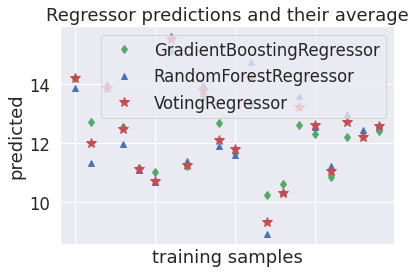

In [93]:
plt.figure()
plt.plot(pred2, "gd", label="GradientBoostingRegressor")
plt.plot(pred1, "b^", label="RandomForestRegressor")
plt.plot(pred3, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

## Almost halfway there :)

Well done! Almost halfway there :)


# Section 2 : Distributed Machine Learning with Spark (55 Points)

Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

Why Spark ML?

Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. This definitely speeds up the learning phase and allows us to create better models.

Read more about it with the python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)

### Initializing Spark Connection - Boring setup stuff again

In [94]:
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 39 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates

In [95]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:13 https://developer.

In [96]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('CA-5').getOrCreate()

In [97]:
%load_ext sparkmagic.magics

In [98]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [99]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

### 5.1 Data Preparation for Spark ML (20 points)

Once the spark setup ready. Next, we need the prepared data for our ML algorithms. We will use the same data you processed in Section 1 but now in spark. 

Read in the csv  into a spark dataframe. Set the "inferSchema" flag to True so that the columns are the correct datatypes and not all strings. Further, set the parameter to the first row as column headers.

In [100]:
# Add your code here

train_sdf = spark.read.format('csv').options(header='true', inferSchema='true').load('combined_data.csv')

Let us make sure everything is smooth to proceed

In [101]:
display(train_sdf.show())

+-----------+-----------------+----------------+----------------------+------------------+------------------+------------------+------------------+--------+--------+---------+----------+----------+----------+----------+-------------------------+---------------+------------------+----------------------+-------------------------+---------------+----------------------+---------------+--------------+------------------------+-----------------------+-----------------------+-----------------------------+--------------+---------------+-----------------+------------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|   video_id|comments_disabled|ratings_disabled|video_error_or_removed|         likes_log|             label|      dislikes_log|       comment_log|num_tags|desc_len|len_title|country_CA|country_FR|country_IN|country_US|category_Autos & Vehicles|category_Comedy|category_Education|category_Entertai

None

Print out the dataframe schema and verify the datatypes

In [102]:
#Task: Print the dataframe schema and verify
# Add your code here
display(train_sdf.printSchema())

root
 |-- video_id: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- likes_log: double (nullable = true)
 |-- label: double (nullable = true)
 |-- dislikes_log: double (nullable = true)
 |-- comment_log: double (nullable = true)
 |-- num_tags: integer (nullable = true)
 |-- desc_len: integer (nullable = true)
 |-- len_title: integer (nullable = true)
 |-- country_CA: integer (nullable = true)
 |-- country_FR: integer (nullable = true)
 |-- country_IN: integer (nullable = true)
 |-- country_US: integer (nullable = true)
 |-- category_Autos & Vehicles: integer (nullable = true)
 |-- category_Comedy: integer (nullable = true)
 |-- category_Education: integer (nullable = true)
 |-- category_Entertainment: integer (nullable = true)
 |-- category_Film & Animation: integer (nullable = true)
 |-- category_Gaming: integer (nullable = true)
 |-- category_Howto & 

None

Now, we have the processed data in hand. Next for the Spark ML, we need to create a feature column that has all features concatenated and a single column for labels.

You can use VectorAssembler() to create a feature vector from all categorical and numerical features. Let us call the call the final vector as “features”.

Now, list all columns in the data and store it in a list named 'all_columns'

In [103]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [104]:
# Add your code here
all_columns =train_sdf.columns

Now create a list of columns which you don't wan't to include in your features, i.e., the labels and probably other columns which are not useful for the machine learning model. Let us call this list drop_columns.

In [105]:
# Add your code here
drop_columns = drop_columns = ['video_id','label']

In [106]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

Now create a VectorAssembler object with columns you want to use for the ML models. Let us Name the output column as 'features'. These are the features that you will use later. Let us name the vector assembler object 'assembler'

In [107]:
# Add your code
assembler = VectorAssembler(inputCols=columns_to_use, outputCol='features')

In [108]:
# Print assember stats
print('stat_assembler', (str(assembler.params), columns_to_use))

stat_assembler ('[Param(parent=\'VectorAssembler_9d89a781bb23\', name=\'handleInvalid\', doc="How to handle invalid data (NULL and NaN values). Options are \'skip\' (filter out rows with invalid data), \'error\' (throw an error), or \'keep\' (return relevant number of NaN in the output). Column lengths are taken from the size of ML Attribute Group, which can be set using `VectorSizeHint` in a pipeline before `VectorAssembler`. Column lengths can also be inferred from first rows of the data since it is safe to do so but only in case of \'error\' or \'skip\')."), Param(parent=\'VectorAssembler_9d89a781bb23\', name=\'inputCols\', doc=\'input column names.\'), Param(parent=\'VectorAssembler_9d89a781bb23\', name=\'outputCol\', doc=\'output column name.\')]', ['comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'likes_log', 'dislikes_log', 'comment_log', 'num_tags', 'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN', 'country_US', 'category_Autos & Vehicles', 'c

Now, we are ready to create a pipeline with different stages.  For our data so far, we just a single stage with the assember, however, you could have other stages  before that where you perform operations on the data, e.g, transforming categorical strings to numeric values or feature scaling operations.

In this step, we will create a pipeline with a single stage - the assembler. Fit the pipeline to your data and create the transformed dataframe and name it 'modified_data_sdf'.

In [109]:
from pyspark.ml import Pipeline
# Add your code here
pipeline = Pipeline(stages=[assembler])
modified_data_sdf = pipeline.fit(train_sdf).transform(train_sdf).drop(*columns_to_use)
display(modified_data_sdf.show())

+-----------+------------------+--------------------+
|   video_id|             label|            features|
+-----------+------------------+--------------------+
|kzwfHumJyYc|13.907476971790734|(37,[3,4,5,6,7,8,...|
|zUZ1z7FwLc8|13.288050682295575|(37,[0,3,4,6,7,8,...|
|10L1hZ9qa58|13.068939393656878|(37,[3,4,5,6,7,8,...|
|N1vE8iiEg64|14.032781700387753|(37,[3,4,5,6,7,8,...|
|kJzGH0PVQHQ|13.047674313372497|(37,[3,4,5,6,7,8,...|
|il_pSa5l98w|15.624892174393528|(37,[3,4,5,6,7,8,...|
|7MxiQ4v0EnE|15.559263780679146|(37,[3,4,5,6,7,8,...|
|c64I9HNpiOY| 16.17526697582603|(37,[3,4,5,6,7,8,...|
|KObFEYCaRx8| 11.68033640902843|(37,[3,4,5,6,7,8,...|
|g8QsfJhFpjY|13.784051882105244|(37,[3,4,5,6,7,8,...|
|4du1KXBl4YU| 13.35782751759637|(37,[3,4,5,6,7,8,...|
|zOOmEDwPJX0|14.669120455465158|(37,[3,4,5,6,7,8,...|
|Prb_osSVE0M| 11.95816241638283|(37,[0,3,4,6,7,8,...|
|KHxdrECEsD0|13.065610998767987|(37,[3,4,5,6,7,8,...|
|so0ccfs-psI|13.636392265237525|(37,[3,4,5,6,7,8,...|
|7gShaSuK_PY|11.402351382259

None

In [110]:
#Print results
pipeline_stat = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
print('check_pipeline', (pipeline_stat.columns.values, pipeline_stat['features'][0].size))

check_pipeline (array(['video_id', 'label', 'features'], dtype=object), 37)


Now that we have the required data in the right format, Let us create our train and test sets. Let us, split into an 80-20 ratio between the train and test sets. Name these 'train_sdf' and 'test_sdf'

In [111]:
# Add your code here
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed = 2021)

In [112]:
#Print results here
print('check_split', (train_sdf.count(), test_sdf.count()))

check_split (123254, 30975)


### 5.2 Linear regression using Spark ML (15 points)

In this section, train s linear regression model to our data and predict the views. This prediction should be based on "Big" data tools, i.e., Spark ML's linear regression. Create a model using this library, fit the training data. 
Afterwards, print the summary stats of the model, i.e, 
- the RMSE error, R2 score and any other information you find useful. Refere the Spark ML documentation online for the implementation.

In this section, we will train the model without any regularization!

In [113]:
from pyspark.ml.regression import LinearRegression

# Add your code here

lr_model = LinearRegression(featuresCol='features', labelCol='label').fit(train_sdf)

In [114]:
trainingSum = lr_model.summary

print("RMSE: %f" % trainingSum.rootMeanSquaredError)
print("r2: %f" % trainingSum.r2)

RMSE: 0.666726
r2: 0.864832


Let us investigate that if the model actually overfits the training data.

Predict the views for your test data (Note: it is called 'transform' in spark ml). Evaluate the performance using 'RegressionEvaluator' in the Spark ML Regression library. Name prediction column as 'prediction'.

In [115]:
# Add your code here
predictions = lr_model.transform(test_sdf)

In [116]:
from pyspark.ml.evaluation import RegressionEvaluator

# Task: Compute RMSr on the test set

test_rmse_orig = lr_model.evaluate(test_sdf).rootMeanSquaredError

In [117]:
#Print results here
predictions_to_print = predictions.toPandas()
lranswer = [test_rmse_orig, predictions_to_print['prediction'][0:50], predictions_to_print['label'][0:50]]
print('result_lr_test', lranswer)

x=predictions_to_print['prediction'][0:50]
y=predictions_to_print['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

result_lr_test [0.6680836832676446, 0     10.689455
1     10.581327
2     11.005251
3     10.702889
4     10.286572
5     11.590491
6     13.262100
7     11.047227
8     11.544116
9     12.445897
10    12.049720
11    11.267933
12    11.977952
13    11.017735
14    11.527805
15    13.147644
16    13.147644
17    11.071909
18    11.517631
19    11.608772
20    11.870405
21    11.234233
22    13.208107
23    13.525551
24    11.961687
25    12.234030
26    11.875323
27    11.875323
28    13.480186
29    11.816098
30    11.994392
31    11.786351
32    12.903977
33    12.808212
34    11.852132
35    13.572612
36    12.257464
37    12.257464
38    12.628452
39    11.600449
40    12.400553
41    11.598370
42    12.775414
43    11.437039
44    12.723687
45    12.002061
46    12.616377
47    12.616377
48    12.597132
49    13.769189
Name: prediction, dtype: float64, 0      9.668651
1      9.829895
2      9.930129
3     10.712126
4     11.018006
5     11.054835
6     11.153762
7     11.175899
8 

Next, we will implement regularization to avoid overfitting. you can try different  regularization parameters, e.g., try LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2).

You can try different regularization hyperparameters to initialize three different regularized linear regression models. Compare these regularization methods with each other and the non-regularized method above.


In [118]:
# Add your code here
LR=LinearRegression
model1= LR(featuresCol='features', labelCol='label', elasticNetParam=1, regParam=0.1)
model1_fit=model1.fit(train_sdf)
model2 = LR(featuresCol='features', labelCol='label', elasticNetParam=0, regParam=0.1)
model2_fit=model2.fit(train_sdf)
elastic_net_model =LR(featuresCol='features', labelCol='label', elasticNetParam=0.5, regParam=0.1).fit(train_sdf)

# Compute predictions using each of the models
l1_predictions = model1_fit.transform(test_sdf)
l2_predictions = model2_fit.transform(test_sdf)
elastic_net_predictions = elastic_net_model.transform(test_sdf)

# Task: Calculate the root mean squared error (RMSE) on test set for each of your models
test_rmse_l1 = model1_fit.evaluate(test_sdf).rootMeanSquaredError
test_rmse_l2 = model2_fit.evaluate(test_sdf).rootMeanSquaredError
test_rmse_elastic = elastic_net_model.evaluate(test_sdf).rootMeanSquaredError

In [119]:
# Print your results here
result = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
print('result_lr_all', result)

result_lr_all [0.7338957894135835, 0.6820046707276309, 0.7038727498387661]


### 5.3 Random Forest Regression 10 pts)

You need an understanding of random forest and its variations,i.e., boosted trees to succeed as a data scientist. These are ensemble methods that are know for generalization and are considered popular for classification and regression problems. Similar to linear regresssion, create a random forest regressor model. After it, train the model using the data and then evaluate its performance using the test data. Finally, compare performance of random forest model with the linear regression model.

In [120]:
from pyspark.ml.regression import RandomForestRegressor
# Add your code here
rf_model = rf_model = RandomForestRegressor(labelCol="label", featuresCol="features").fit(train_sdf) #Task

In [121]:
# Add code here to calculate predictions
predictions = predictions = rf_model.transform(test_sdf) #Task : Calculate predictions on the test set

In [122]:
from pyspark.ml.evaluation import RegressionEvaluator

# Add your code here to instatiate a regressionevaluator 
reg_evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
train_rmse_rf = reg_evaluator.evaluate(rf_model.transform(train_sdf)) #Task: Compute the training RMSE
rmse_rf = reg_evaluator.evaluate(predictions) #Task: Compute RMSE using the test set

In [123]:
#Print results of predictions here
predictions_to_reveal = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_reveal['prediction'][0:50], predictions_to_reveal['label'][0:50], rmse_rf]
print('check_rf_spark \n', answer)

x=predictions_to_reveal['prediction'][0:50]
y=predictions_to_reveal['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

check_rf_spark 
 [0.722702988099663, 0     10.900335
1     10.622649
2     10.937377
3     11.399996
4     10.800194
5     11.753933
6     13.160865
7     11.221447
8     11.691378
9     12.414728
10    11.892932
11    11.435676
12    11.621849
13    11.378713
14    11.541946
15    12.918614
16    12.918614
17    10.731081
18    11.909913
19    12.054996
20    11.825730
21    10.928273
22    12.842791
23    13.550858
24    12.386876
25    11.886356
26    11.577533
27    11.577533
28    13.267185
29    11.859094
30    11.897975
31    11.327590
32    12.682341
33    12.648268
34    11.684233
35    13.275136
36    12.417066
37    12.417066
38    12.673207
39    11.592968
40    12.588421
41    11.592968
42    12.634591
43    11.544507
44    12.615365
45    11.892932
46    12.799235
47    12.799235
48    12.657006
49    13.919702
Name: prediction, dtype: float64, 0      9.668651
1      9.829895
2      9.930129
3     10.712126
4     11.018006
5     11.054835
6     11.153762
7     11.175899
8

### 5.4 Gradient Boosting Regression (Task2 part1- Regression Model)
Gradient Boosting tree regression is another ensemble method. The difference between Random Forest and Gradient Boosting lies in the way the trees are built. GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree. The model will be implemented by importing GBT regressor from Mlib. Once the accuracy is checked, we can rely on the appropriate model to finalize based on best available accuracy evaluated through regression evaluator.

In [124]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor

In [125]:
gbt = GBTRegressor(labelCol="label", featuresCol="features", maxIter=10)

In [126]:
gbt_model = gbt.fit(train_sdf)

In [127]:
predictions = gbt_model.transform(test_sdf)

In [128]:
from pyspark.ml.evaluation import RegressionEvaluator

# Add your code here to instatiate a regressionevaluator 
gbt_evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
train_rmse_gbt = gbt_evaluator.evaluate(gbt_model.transform(train_sdf)) #Task: Compute the training RMSE
rmse_gbt = gbt_evaluator.evaluate(predictions) #Task: Compute RMSE using the test set

#Print results of predictions here
predictions_to_reveal = predictions.toPandas()
answer = [train_rmse_gbt, predictions_to_reveal['prediction'][0:500], predictions_to_reveal['label'][0:500], rmse_gbt]
print('check_gbt_spark \n', answer)

x=predictions_to_reveal['prediction'][0:50]
y=predictions_to_reveal['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

check_gbt_spark 
 [0.6672353910621585, 0      10.524902
1      10.501362
2      10.084784
3      11.027729
4      10.970112
         ...    
495    11.051913
496    12.483138
497    12.741112
498    10.746261
499    11.414361
Name: prediction, Length: 500, dtype: float64, 0       9.668651
1       9.829895
2       9.930129
3      10.712126
4      11.018006
         ...    
495    10.514285
496    11.852763
497    12.921796
498    11.204578
499    10.951157
Name: label, Length: 500, dtype: float64, 0.6704441742259695]

 Differences between Prediction and label: 
 0     0.856251
1     0.671468
2     0.154654
3     0.315603
4    -0.047894
5     0.390090
6     1.371761
7    -0.025567
8     0.570763
9     1.336625
10    0.634135
11    0.236549
12    0.551850
13    0.060663
14   -0.205287
15    1.175065
16    1.175065
17   -1.019681
18   -0.018518
19   -0.364141
20   -0.099070
21   -1.250351
22    1.227616
23    0.953782
24   -0.075734
25   -0.076908
26   -0.032698
27   -0.032698
28    1.5209

In [129]:
accuracy = gbt_evaluator.evaluate(predictions)

In [130]:
print("Accuracy = %g" % accuracy)

Accuracy = 0.670444


### 5.5 Task 2 part II- Implement Classification Model

In this task, a classification model is implemented on processed data set combined_data.csv for predicting the impact of ratings disabled variable on all features. This can enable us to understand the weightage of factors leading to whether a review is abled or disabled.

In [131]:
df = spark.read.format('csv').options(header='true', inferSchema='true').load('combined_data.csv')

In [132]:
display(df.show())

+-----------+-----------------+----------------+----------------------+------------------+------------------+------------------+------------------+--------+--------+---------+----------+----------+----------+----------+-------------------------+---------------+------------------+----------------------+-------------------------+---------------+----------------------+---------------+--------------+------------------------+-----------------------+-----------------------+-----------------------------+--------------+---------------+-----------------+------------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|   video_id|comments_disabled|ratings_disabled|video_error_or_removed|         likes_log|             label|      dislikes_log|       comment_log|num_tags|desc_len|len_title|country_CA|country_FR|country_IN|country_US|category_Autos & Vehicles|category_Comedy|category_Education|category_Entertai

None

In [133]:
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
df = df.withColumn("ratings_disabled", df["ratings_disabled"].cast(IntegerType()))

In [134]:
display(df.show())

+-----------+-----------------+----------------+----------------------+------------------+------------------+------------------+------------------+--------+--------+---------+----------+----------+----------+----------+-------------------------+---------------+------------------+----------------------+-------------------------+---------------+----------------------+---------------+--------------+------------------------+-----------------------+-----------------------+-----------------------------+--------------+---------------+-----------------+------------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|   video_id|comments_disabled|ratings_disabled|video_error_or_removed|         likes_log|             label|      dislikes_log|       comment_log|num_tags|desc_len|len_title|country_CA|country_FR|country_IN|country_US|category_Autos & Vehicles|category_Comedy|category_Education|category_Entertai

None

In [135]:
print((df.count(), len(df.columns)))

(154229, 39)


In [136]:
display(df.printSchema())

root
 |-- video_id: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: integer (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- likes_log: double (nullable = true)
 |-- label: double (nullable = true)
 |-- dislikes_log: double (nullable = true)
 |-- comment_log: double (nullable = true)
 |-- num_tags: integer (nullable = true)
 |-- desc_len: integer (nullable = true)
 |-- len_title: integer (nullable = true)
 |-- country_CA: integer (nullable = true)
 |-- country_FR: integer (nullable = true)
 |-- country_IN: integer (nullable = true)
 |-- country_US: integer (nullable = true)
 |-- category_Autos & Vehicles: integer (nullable = true)
 |-- category_Comedy: integer (nullable = true)
 |-- category_Education: integer (nullable = true)
 |-- category_Entertainment: integer (nullable = true)
 |-- category_Film & Animation: integer (nullable = true)
 |-- category_Gaming: integer (nullable = true)
 |-- category_Howto & 

None

In [137]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [138]:
all_columns =df.columns

In [139]:
drop_columns = drop_columns = ['video_id','ratings_disabled']

In [140]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

In [141]:
assembler = VectorAssembler(inputCols=columns_to_use, outputCol='featurz')

In [142]:
print('stat_assembler', (str(assembler.params), columns_to_use))

stat_assembler ('[Param(parent=\'VectorAssembler_c65dce46dc69\', name=\'handleInvalid\', doc="How to handle invalid data (NULL and NaN values). Options are \'skip\' (filter out rows with invalid data), \'error\' (throw an error), or \'keep\' (return relevant number of NaN in the output). Column lengths are taken from the size of ML Attribute Group, which can be set using `VectorSizeHint` in a pipeline before `VectorAssembler`. Column lengths can also be inferred from first rows of the data since it is safe to do so but only in case of \'error\' or \'skip\')."), Param(parent=\'VectorAssembler_c65dce46dc69\', name=\'inputCols\', doc=\'input column names.\'), Param(parent=\'VectorAssembler_c65dce46dc69\', name=\'outputCol\', doc=\'output column name.\')]', ['comments_disabled', 'video_error_or_removed', 'likes_log', 'label', 'dislikes_log', 'comment_log', 'num_tags', 'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN', 'country_US', 'category_Autos & Vehicles', 'category_Com

In [143]:
from pyspark.ml import Pipeline
# Add your code here
pipeline = Pipeline(stages=[assembler])
modified_data_sdf = pipeline.fit(df).transform(df).drop(*columns_to_use)
display(modified_data_sdf.show())

+-----------+----------------+--------------------+
|   video_id|ratings_disabled|             featurz|
+-----------+----------------+--------------------+
|kzwfHumJyYc|               0|(37,[2,3,4,5,6,7,...|
|zUZ1z7FwLc8|               0|(37,[0,2,3,4,6,7,...|
|10L1hZ9qa58|               0|(37,[2,3,4,5,6,7,...|
|N1vE8iiEg64|               0|(37,[2,3,4,5,6,7,...|
|kJzGH0PVQHQ|               0|(37,[2,3,4,5,6,7,...|
|il_pSa5l98w|               0|(37,[2,3,4,5,6,7,...|
|7MxiQ4v0EnE|               0|(37,[2,3,4,5,6,7,...|
|c64I9HNpiOY|               0|(37,[2,3,4,5,6,7,...|
|KObFEYCaRx8|               0|(37,[2,3,4,5,6,7,...|
|g8QsfJhFpjY|               0|(37,[2,3,4,5,6,7,...|
|4du1KXBl4YU|               0|(37,[2,3,4,5,6,7,...|
|zOOmEDwPJX0|               0|(37,[2,3,4,5,6,7,...|
|Prb_osSVE0M|               0|(37,[0,2,3,4,6,7,...|
|KHxdrECEsD0|               0|(37,[2,3,4,5,6,7,...|
|so0ccfs-psI|               0|(37,[2,3,4,5,6,7,...|
|7gShaSuK_PY|               0|(37,[2,3,4,5,6,7,...|
|ep3SLMuRbvg

None

In [144]:
pipeline_stat = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
print('check_pipeline', (pipeline_stat.columns.values, pipeline_stat['featurz'][0].size))

check_pipeline (array(['video_id', 'ratings_disabled', 'featurz'], dtype=object), 37)


In [145]:
train_sdf1, test_sdf1 = modified_data_sdf.randomSplit([0.8, 0.2], seed = 2021)
print('check_split', (train_sdf.count(), test_sdf.count()))

check_split (123254, 30975)


In [146]:
display(train_sdf1.show())

+--------+----------------+--------------------+
|video_id|ratings_disabled|             featurz|
+--------+----------------+--------------------+
|  #NAME?|               0|(37,[0,2,3,4,6,7,...|
|  #NAME?|               0|(37,[0,2,3,4,6,7,...|
|  #NAME?|               0|(37,[0,2,3,4,6,7,...|
|  #NAME?|               0|(37,[0,2,3,4,6,7,...|
|  #NAME?|               0|(37,[0,2,3,4,6,7,...|
|  #NAME?|               0|(37,[0,2,3,4,6,7,...|
|  #NAME?|               0|(37,[0,2,3,4,6,7,...|
|  #NAME?|               0|(37,[0,2,3,4,6,7,...|
|  #NAME?|               0|(37,[0,2,3,4,6,7,...|
|  #NAME?|               0|(37,[0,2,3,4,7,8,...|
|  #NAME?|               0|(37,[0,2,3,4,7,8,...|
|  #NAME?|               0|(37,[0,2,3,4,7,8,...|
|  #NAME?|               0|(37,[2,3,4,5,6,7,...|
|  #NAME?|               0|(37,[2,3,4,5,6,7,...|
|  #NAME?|               0|(37,[2,3,4,5,6,7,...|
|  #NAME?|               0|(37,[2,3,4,5,6,7,...|
|  #NAME?|               0|(37,[2,3,4,5,6,7,...|
|  #NAME?|          

None

####5.5.1 Logistic Regression

Logistic regression classification model is a popular method to predict a categorical response. Since the label column has 2 values, binary logistic regression and binary classification evaluator is used.

For hyper parameter tuning, multiple values are added as an array for Elastic Net mixing Parameters, Iterations and Logistic Regression params. These arrays are converted to list which will be called during LogisticRegression() model.

In [147]:
import itertools   
regParam        = [0.1, 0.5, 2.0]
elasticNetParam = [0.0,  0.5, 1.0]
maxIter         = [10, 50, 100]
experiments     = list(itertools.product(regParam, elasticNetParam, maxIter))
print(len(experiments))


27


In [148]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier

from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [149]:
for ind, experiment in enumerate(experiments):
    regParam        = experiment[0]
    elasticNetParam = experiment[1]
    maxIter         = experiment[2]

    print(ind)
    print('params: ', regParam, elasticNetParam, maxIter)
    
    lr = LogisticRegression(labelCol="ratings_disabled", 
                            featuresCol="featurz", 
                            regParam=regParam,
                            elasticNetParam=elasticNetParam,
                            maxIter=maxIter
                            )
    
    # Train model with Training Data
    lrModel     = lr.fit(train_sdf1)
    
    # Make predictions on validation data using the transform() method.
    # LogisticRegression.transform() will only use the 'features' column.
    predictions = lrModel.transform(test_sdf1)
    
    # evaluate predictions
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol='ratings_disabled')
    acc       = evaluator.evaluate(predictions)
    
    print('Accuracy: ', acc)
 

0
params:  0.1 0.0 10
Accuracy:  0.9954222916327152
1
params:  0.1 0.0 50
Accuracy:  0.9954222916327152
2
params:  0.1 0.0 100
Accuracy:  0.9954222916327152
3
params:  0.1 0.5 10
Accuracy:  0.5
4
params:  0.1 0.5 50
Accuracy:  0.5
5
params:  0.1 0.5 100
Accuracy:  0.5
6
params:  0.1 1.0 10
Accuracy:  0.5
7
params:  0.1 1.0 50
Accuracy:  0.5
8
params:  0.1 1.0 100
Accuracy:  0.5
9
params:  0.5 0.0 10
Accuracy:  0.993051412901645
10
params:  0.5 0.0 50
Accuracy:  0.993051412901645
11
params:  0.5 0.0 100
Accuracy:  0.9930514129016451
12
params:  0.5 0.5 10
Accuracy:  0.5
13
params:  0.5 0.5 50
Accuracy:  0.5
14
params:  0.5 0.5 100
Accuracy:  0.5
15
params:  0.5 1.0 10
Accuracy:  0.5
16
params:  0.5 1.0 50
Accuracy:  0.5
17
params:  0.5 1.0 100
Accuracy:  0.5
18
params:  2.0 0.0 10
Accuracy:  0.9927670674100172
19
params:  2.0 0.0 50
Accuracy:  0.9927670674100173
20
params:  2.0 0.0 100
Accuracy:  0.9927670674100171
21
params:  2.0 0.5 10
Accuracy:  0.5
22
params:  2.0 0.5 50
Accuracy:  

Multiple values of accuracy is visible. 99.5% is the highest accuracy achieved for 10 iterations, 0.0 elastic net param and 0.1 regParam values.

In [150]:
print("coefficients: " + str(lrModel.coefficientMatrix))
print("intercepts: " + str(lrModel.interceptVector))

coefficients: 1 X 37 CSRMatrix

intercepts: [-4.459869512254484]


In [151]:
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.06248131231725768


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.



+---+---+
|FPR|TPR|
+---+---+
|0.0|0.0|
|1.0|1.0|
|1.0|1.0|
+---+---+

areaUnderROC: 0.5


LogisticRegression_5e2d03bc24ca

### 5.6 Dimensionality Reduction using Principal Component Analysis (10pt)

The focus of this section is to utilize PCA to further reduce the dimensions of data, i.e., a lower dimensional space. After PCA perform linear regression on the new data. You can select a suitable value for the number of dimensions as calculated in previous section.

The steps are illustrated below:
1.   Initialization of PCA model
2.   Fit the PCA model using the training data
3.   Extract the PCA feature from the trained PCA model from step 2
4.   Train a linear regression model using the retreived PCA features
5.   Evaluate the trained model 's performance on the test set 

This section requires extra effort and therefore has less starter code. Spen time to understand and implement considering yourself a data scientist working on an assigned task.

In [152]:
# Add your code for the PCA model and training here
from pyspark.ml.feature import PCA as PCA_ML
pca_Lr = PCA_ML(k=34, inputCol='features', outputCol='pcaFeature').fit(train_sdf).transform(train_sdf)

pca_lr_model=LinearRegression(featuresCol='pcaFeature', labelCol='label', elasticNetParam=1, regParam=0.1).fit(pca_Lr)

training_rmse_pca = reg_evaluator.evaluate(pca_lr_model.transform(pca_Lr))

In [153]:
# Add your code here
pca_Lr_test = PCA_ML(k=34, inputCol='features', outputCol='pcaFeature').fit(train_sdf).transform(test_sdf)

predictions = pca_lr_model.transform(pca_Lr_test) #Task: Retreive predictions on the test set

test_rmse_pca = reg_evaluator.evaluate(pca_lr_model.transform(pca_Lr_test)) #Task: Retreive RMSE for test data

In [154]:
# Add your code here
predictions_to_grade = predictions.toPandas()
answer = [training_rmse_pca, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], test_rmse_pca]
print('check_pca_spark \n', answer)

x=predictions_to_grade['prediction'][0:50]
y=predictions_to_grade['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

print('\n \n Model Summery:',pca_lr_model.summary.r2)

check_pca_spark 
 [0.7556473497735112, 0     10.938431
1     10.875887
2     10.184046
3     10.640630
4     10.636015
5     11.578566
6     13.037811
7     11.022325
8     11.735197
9     12.276016
10    11.893918
11    11.344813
12    12.014372
13    11.081861
14    11.607520
15    13.103707
16    13.103707
17    11.255943
18    11.722413
19    11.819103
20    11.823611
21    11.416744
22    13.045205
23    13.620706
24    12.066434
25    12.511210
26    11.955678
27    11.955678
28    13.395693
29    12.077007
30    11.678988
31    10.857226
32    12.879338
33    12.995058
34    11.873429
35    13.373649
36    12.303463
37    12.303463
38    12.104946
39    10.968543
40    12.444278
41    10.967992
42    12.762149
43    10.624729
44    12.843149
45    11.829084
46    12.216641
47    12.216641
48    12.483464
49    13.623927
Name: prediction, dtype: float64, 0      9.668651
1      9.829895
2      9.930129
3     10.712126
4     11.018006
5     11.054835
6     11.153762
7     11.175899

#### 5.6.1 Gradient Boosting Regressor with PCA Features (Task2 part1- Regression Model)

In [155]:
gbt = GBTRegressor(labelCol="label", featuresCol="pcaFeature", maxIter=10)

In [156]:
gbt_model = gbt.fit(pca_Lr)

In [157]:
predictions = gbt_model.transform(pca_Lr_test)

In [158]:
from pyspark.ml.evaluation import RegressionEvaluator

accuracy = gbt_evaluator.evaluate(predictions)

print("Accuracy = %g" % accuracy)

Accuracy = 0.758758


# Submission

**Submission on the blackboard**. 
** PDF submission for the simalarity check and .ipynb for original submission **

Go to the "File" tab at the top left, and click "Download .ipynb". Submit under 'scalableMachinelearning.ipynb'.

You must submit your notebook to blackboard for the grading.